<a href="https://colab.research.google.com/github/pdh0184/Celine_project/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EC%9D%B8%EC%BD%94%EB%94%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 셀린느 크롤링 데이터 이미지 확인
- Base64로 인코딩된 데이터이므로 다시 디코딩

In [2]:
import pandas as pd
import base64
from PIL import Image
from io import BytesIO
import numpy as np
import cv2
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/개인 프로젝트 파일/Celine_project/CELINE_DATA.xlsx', header = 1)
df

,제품명,가격,색깔,상세주소,이미지 주소,이미지 데이터
0,celine 보니 백팩 - 부드러운 카프스킨,"₩ 4,050,000",블랙,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,celine 보니 백팩 - 트리옹프 캔버스 & 카프스킨,"₩ 3,550,000",탠,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
2,celine 보니 백팩 - 부드러운 카프스킨,"₩ 4,050,000",아이스 블루,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
3,celine 보니 백팩 - 부드러운 카프스킨,"₩ 4,050,000",라이스,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
4,미디엄 루이즈백 - 부드러운 카프스킨,"₩ 4,350,000",블랙,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
...,...,...,...,...,...,...
191,스몰 블랑딘 박스 - 트리옹프 캔버스 & 카프스킨,"₩ 4,050,000",탠,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
192,트리옹프 오벌 박스 - 트리옹프 캔버스와 카프스킨,"₩ 4,600,000",탠,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
193,celine 니나 미노디에르 - 트리옹프 캔버스 프린트 램스킨 & 카프스킨,"₩ 5,100,000",탠,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
194,미니 버티컬 카바스 - celine 프린트 트리옹프 캔버스 & 카프스킨,"₩ 2,100,000",탠,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


### 이미지 인코딩 컬럼 생성
- 이미지 주소에서 이미지 로딩 후 Base64로 인코딩

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import base64

image_data_list = []

for index, row in df.iterrows():
    try:
      url = row['이미지 주소'][:-6]
    except Exception as e:
      url = None
      print(f"Error occurred: {e}")
    try:
        # 이미지 요청
        response = requests.get(url)
        response.raise_for_status()  # HTTP 에러 발생 시 예외 처리

        # 이미지 로드
        image = Image.open(BytesIO(response.content))

        # 이미지를 Base64로 인코딩
        buffered = BytesIO()
        image.save(buffered, format="PNG")
        img_base64 = base64.b64encode(buffered.getvalue()).decode()

        # 리스트에 추가
        image_data_list.append(img_base64)

        print(f"{index} Processed image for {row['제품명']}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the image for {row['제품명']}: {e}")
        image_data_list.append(None)  # 실패 시 None 추가
    except Exception as e:
        print(f"Unexpected error for {row['제품명']}: {e}")
        image_data_list.append(None)  # 실패 시 None 추가

# 새로운 열로 추가
df['이미지 데이터'] = image_data_list

데이터 확인

In [4]:
df['이미지 데이터'].head()

,이미지 데이터
0,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
1,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
2,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
3,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
4,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...


### 잘 실행되는지 확인하기 위하여 5장만 디코딩

In [5]:
df.iloc[:5]

,제품명,가격,색깔,상세주소,이미지 주소,이미지 데이터
0,celine 보니 백팩 - 부드러운 카프스킨,"₩ 4,050,000",블랙,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
1,celine 보니 백팩 - 트리옹프 캔버스 & 카프스킨,"₩ 3,550,000",탠,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
2,celine 보니 백팩 - 부드러운 카프스킨,"₩ 4,050,000",아이스 블루,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
3,celine 보니 백팩 - 부드러운 카프스킨,"₩ 4,050,000",라이스,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...
4,미디엄 루이즈백 - 부드러운 카프스킨,"₩ 4,350,000",블랙,https://www.celine.com/ko-kr/celine-%EC%97%AC%...,https://twicpics.celine.com/product-prd/image...,iVBORw0KGgoAAAANSUhEUgAAB9AAAAfQCAIAAAAVWlMuAA...


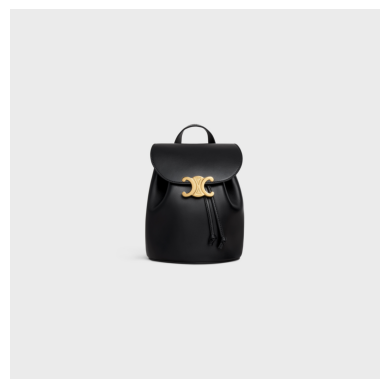

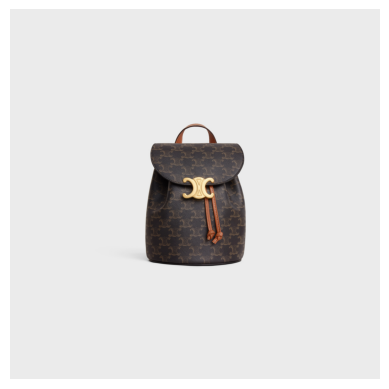

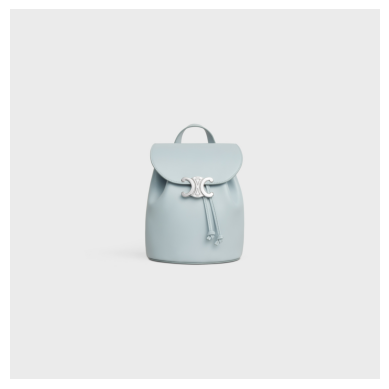

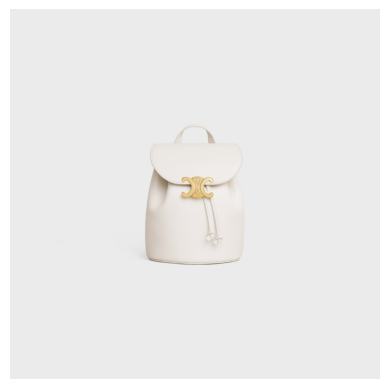

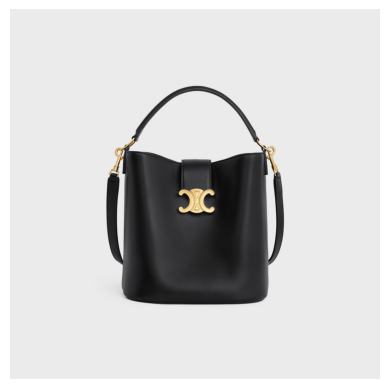

In [7]:
for index, row in df.iloc[:5].iterrows():

  img_base64 = row['이미지 데이터']


  #바이너리 데이터로 디코딩
  imgdata = base64.b64decode(img_base64)

  # 바이너리 데이터를 이미지로 변환
  img_out = Image.open(BytesIO(imgdata))

  # 이미지 확인 (matplotlib 사용)
  plt.imshow(img_out)
  plt.axis('off')  # 축 숨기기
  plt.show()

In [9]:
df.to_excel("/content/drive/MyDrive/개인 프로젝트 파일/Celine_project/CELINE_DATA.xlsx", index=False)